# 2020.02.10  CNN

In [ ]:
# CNN
[cnn에서 중요한것은 망의 깊이 ]- 얼마나 깊게하는지 - 어떻게 깊게하는지 
[cnn에서  중요한것은 이미지를 어떻게 늘릴것인지]


[FILTER]
- 필터사이즈가 크면 큰특징 작으면 작은특징
    - 크게하면 손실이 크다 작게하면 deep하게 할 수 있따 
        - 작게한 것 중 deep한것의 대표적인것은 VGG16,19
        - identity 시키는 것_ 이전의 것을 고려 _ 깊게하더라도 살아남는다
- 인셉션: 망을 깊게하기전에 수평으로한다 . 

[IMAGE]
- image data generator:이미지 증강 
    - 이미지 증강을 통해 이미지 구조문제 해결 : 이미지를 다양하게 변화
        - pool , scale 등의 방법으로 
        - 증강해논애들을 다시 save할 수 있따
    - 파일로 많은 데이터를 저장해놨다가 읽어들이면서 fitting
 
[MODEL]
- 모델만들기 => compile => fit => evaluATE => PREDICT
- 모델만드는 법 3 가지 :
    - sequential 
    - functional : multi => multi
        - 이미지가 특성이 다를떄?
    - model:class 베이스로 모델을 구성하고 싶을때
    
- STATIC MODE:모델만들고 실행해야 결과알수있음:
    - 속도가 아주빠르다
- DIRECT MODE
    - 효율성이 높다 
    
    
    
#현재 effcient net 에서 transfer learning으로 대세가 바뀌고 있따


#http://incredible.ai/artificial-intelligence/2017/05/13/Transfer-Learning/
- application : transfer learning: 
    - 기존의 만들어진 모델을 사용하여 새로운 모델을 만들시 학습을 빠르게 하며,
      예측을 더 높이는 방법입니다.
    - a를 b에 맵핑해준다?
    - 데이터 부족문제 해결
    ↓↓↓↓↓↓↓↓↓↓↓↓↓
    얘랑 의미가 비슷하다
    cf)준지도학습: 라벨이 있는애와 없는애가 있따 : 라벨이 있는애를 기반으로 없는애한테 라벨을 달아준다 
    - vert에도 적용 : pre training을 이용해 목적에 맞게 fine tuning한다 
    
- global average(maximum) pooling : 
    - covolution 연산이 끝난 후 flatten 해줄때 이미지의 특성을 잃지않게하는것?

    
- efficient net: 이미지를 잘처리하는 방법 : 동영상 처리에 부적합
    - 1 filter의 사이즈 
    - 2 depth:layer의 깊이
    - 3 원본의 resolution: 원본의 해상도를 어떻게하느냐
    
    

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.
C:\Users\ICT01_09\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_09\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_09\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_09\Anaconda3\envs

In [21]:
# channel_first, channel_last

# x_train = x_train.reshape(x_train.shape[0],1, 28,28,)   <- channel first
# x_test = x_test.reshape(x_test.shape[0], 1,  28,28)

x_train = x_train.reshape(x_train.shape[0], 28,28,1 )    # <- channel last
x_test = x_test.reshape(x_test.shape[0],  28,28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')   #
print(x_test.shape[0], 'test samples')    # 

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [22]:
model = Sequential()

# 아웃풋 필터 개수(32), 필터 사이즈(3x3)
# 입력데이터 (28x28) , 나가는 데이터 (128(batch) x 26(28-3+1)x26(28-3+1)x 32(아웃풋 32))
# valid(줄어드는것) <- 모서리 특징 노캐어, same(28x28) <- 모서리 특징이 산다
model.add(Conv2D(32, 3,3, activation = 'relu', input_shape = (28,28,1)))  # channel이 뭐지에 따라 맞춰줘야한다(last를 써서 뒤에 1)

# 128 x 24(26-3+1) x 24(26-3+1) x 64
model.add(Conv2D(64, 3,3, activation = 'relu'))

# 128,12,12,64
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))

# 12,12,64 => 1차원 9216( 3수를 다 곱함)
model.add(Flatten())

# FFNN , FC(fully - connected)
# dense (나가는 차수만 지정 : 128)
model.add(Dense(128, activation = 'relu'))  # <- 가중치 :9216x128 
# 128 x 128
model.add(Dropout(0.5)) # 계산 회로만 생략 (차수는 그대로)

model.add(Dense(10, activation = 'softmax')) # 128x10

# 128x10

C:\Users\ICT01_09\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\ICT01_09\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [23]:
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

# train, test 만 하니까 test도 fitting 되는걸 방지하기 위해서
# train, test, validation으로 나눠준다
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 56s 926us/step - loss: 0.2684 - accuracy: 0.9174 - val_loss: 0.0537 - val_accuracy: 0.9833
Epoch 2/12
60000/60000 [==============================] - 55s 909us/step - loss: 0.0866 - accuracy: 0.9742 - val_loss: 0.0499 - val_accuracy: 0.9846
Epoch 3/12
60000/60000 [==============================] - 54s 898us/step - loss: 0.0663 - accuracy: 0.9803 - val_loss: 0.0333 - val_accuracy: 0.9895
Epoch 4/12
60000/60000 [==============================] - 54s 897us/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0330 - val_accuracy: 0.9890
Epoch 5/12
60000/60000 [==============================] - 54s 900us/step - loss: 0.0466 - accuracy: 0.9866 - val_loss: 0.0329 - val_accuracy: 0.9896
Epoch 6/12
60000/60000 [==============================] - 54s 900us/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 7/12
60000/60000 [==============================] 

In [26]:
print('loss:', '\t',score[0])  # loss
print('accuracy :', '\t',score[1])  # accuracy

loss: 	 0.02610298545975238
accuracy : 	 0.991599977016449


# CNN

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

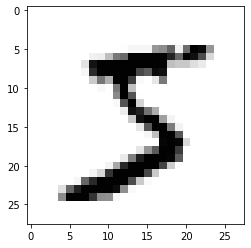

In [40]:
first_image = x_train[0, :, :]
plt.imshow(first_image, cmap = plt.cm.Greys);

In [41]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1 )    # <- channel last
x_test = x_test.reshape(x_test.shape[0],  28,28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')   #
print(x_test.shape[0], 'test samples')    # 

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()

# 아웃풋 필터 개수(32), 필터 사이즈(3x3)
# 입력데이터 (28x28) , 나가는 데이터 (128(batch) x 26(28-3+1)x26(28-3+1)x 32(아웃풋 32))
# valid(줄어드는것) <- 모서리 특징 노캐어, same(28x28) <- 모서리 특징이 산다
model.add(Conv2D(32, 3,3, activation = 'relu', input_shape = (28,28,1)))  # channel이 뭐지에 따라 맞춰줘야한다(last를 써서 뒤에 1)

# 128 x 24(26-3+1) x 24(26-3+1) x 64
model.add(Conv2D(64, 3,3, activation = 'relu'))

# 128,12,12,64
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))

# 12,12,64 => 1차원 9216( 3수를 다 곱함)
model.add(Flatten())

# FFNN , FC(fully - connected)
# dense (나가는 차수만 지정 : 128)
model.add(Dense(128, activation = 'relu'))  # <- 가중치 :9216x128 
# 128 x 128
model.add(Dropout(0.5)) # 계산 회로만 생략 (차수는 그대로)

model.add(Dense(10, activation = 'softmax')) # 128x10


model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])


x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


C:\Users\ICT01_09\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
C:\Users\ICT01_09\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


In [ ]:
# key 이름 확인하기
model.history.history.keys()

In [46]:
class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩 (재정의)
    def on_train_begin(self, logs={}):  # 훈련시작시 이벤트
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('accuracy'))
        

history = AccuracyHistory()
history.on_train_begin()
# train, test 만 하니까 test도 fitting 되는걸 방지하기 위해서
# train, test, validation으로 나눠준다
# epoch마다 accuracy를 저장 - 12번 저장된다
model.fit(x_train, y_train, batch_size = batch_size, 
          epochs = epochs, verbose = 1, validation_data = (x_test, y_test), callbacks = [history])

score = model.evaluate(x_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 55s 919us/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 2/12
60000/60000 [==============================] - 55s 914us/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0264 - val_accuracy: 0.9924
Epoch 3/12
60000/60000 [==============================] - 55s 918us/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0309 - val_accuracy: 0.9899
Epoch 4/12
60000/60000 [==============================] - 56s 928us/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0288 - val_accuracy: 0.9906
Epoch 5/12
60000/60000 [==============================] - 54s 906us/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0254 - val_accuracy: 0.9918
Epoch 6/12
60000/60000 [==============================] - 54s 901us/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0270 - val_accuracy: 0.9918
Epoch 7/12
60000/60000 [==============================] 

loss: 	 0.02646493338981254
accuracy : 	 0.9922000169754028


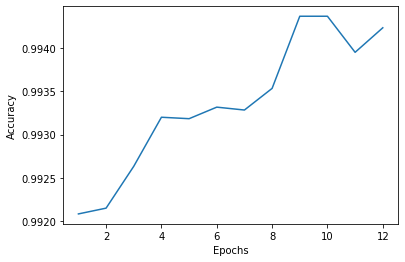

In [48]:
print('loss:', '\t', score[0])  
print('accuracy :', '\t', score[1])  

plt.plot(range(1, 13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# CNN   ----- ?
K.set_image_data_format('channels_first')  # channels_last

In [50]:
# HDFS(hadoop file system) : model 구조 전체 저장
# 가중치, 구조, optimization state 등이 저장
# jason으로 저장가능 : 가중치, 구조를 별도로 저장해야함 => web에서 tensorflow 가능해서
# tensorflow.js import
model.save("model_mnist.h5")
print("모델이 저장되었습니다.")
from keras.models import load_model

model = load_model('model_mnist.h5')
print("모델이 로딩되었습니다.")
model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_12 (Dropout)       

In [52]:
# layer 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_15
(None, 28, 28, 1)
<function relu at 0x00000203C7F4B1F8>
(None, 26, 26, 32)


# ImageData Generator

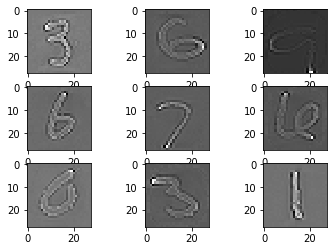

In [65]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 이미지 조금씩 변화주기
#1. 방법# datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
#2. 방법# datagen = ImageDataGenerator(width_shift = True, heigh_shift = True)   

#3. 방법# 이미지 백색화 => noise 제거 (변수간 상관도를 없앰 : PCA)
datagen = ImageDataGenerator(zca_whitening = True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
                                     # augment
                                     save_to_dir = 'images', save_prefix = 'aug', save_format = 'png'):
    
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap = pyplot.get_cmap('gray'))
    
    pyplot.show()
    break

In [43]:

from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3 )
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'name_scope'

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'name_scope'

In [40]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

NameError: name 'RMSprop' is not defined

In [6]:
from keras.layers import Activation

model = Sequential()

# residual망의 영향
# 32x32x3(kernel) =>  32x32x32 (padding이 same이라서) 
model.add(Conv2D(32, kernel_size = 3, padding = 'same', input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [7]:
model.add(Conv2D(64, kernel_size = 3, padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_09\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()


model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [9]:
# 모델 피팅
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, 
                    validation_split = VALIDATION_SPLIT, verbose = VERBOSE)


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.7803 - accuracy: 0.3581 - val_loss: 1.3732 - val_accuracy: 0.5040
Epoch 2/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.3199 - accuracy: 0.5348 - val_loss: 1.1495 - val_accuracy: 0.6150
Epoch 3/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.1147 - accuracy: 0.6063 - val_loss: 1.1759 - val_accuracy: 0.5815
Epoch 4/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.9814 - accuracy: 0.6594 - val_loss: 0.9617 - val_accuracy: 0.6674
Epoch 5/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.8876 - accuracy: 0.6869 - val_loss: 0.9411 - val_accuracy: 0.6686
Epoch 6/10
40000/40000 [==============================] - 59s 1ms/step - loss: 0.8254 - accuracy: 0.7134 - val_loss: 0.8067 - val_accuracy: 0.7203
Epoch 7/10
40000/40000 [==============================] - 58s 1ms/s

In [10]:
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print('\nTest score:', score[0])
print('\nTest accuracy:', score[1])

10000/10000 [==============================] - 5s 533us/step

Test score: 0.7576467494964599

Test accuracy: 0.7501999735832214


In [12]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

datagen = ImageDataGenerator(   # 똑같은 데이터 : random 순서
    featurewise_center = False, 
    samplewise_center = False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization = False, 
    zca_whitening=False,  # 이미지 PCA 노이즈 제거
    rotation_range = 0, 
    width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip = True, vertical_flip = False)


datagen.fit(X_train)

In [14]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = BATCH_SIZE), samples_per_epoch = X_train.shape[0], 
                   nb_epoch=NB_EPOCH, verbose = VERBOSE)

C:\Users\ICT01_09\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\ICT01_09\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=1, steps_per_epoch=390, epochs=10)`
  


Epoch 1/10
390/390 [==============================] - 71s 182ms/step - loss: 0.9002 - accuracy: 0.6896
Epoch 2/10
390/390 [==============================] - 71s 183ms/step - loss: 0.8673 - accuracy: 0.6994
Epoch 3/10
390/390 [==============================] - 69s 177ms/step - loss: 0.8490 - accuracy: 0.7089
Epoch 4/10
390/390 [==============================] - 67s 173ms/step - loss: 0.8276 - accuracy: 0.7133
Epoch 5/10
390/390 [==============================] - 66s 170ms/step - loss: 0.8123 - accuracy: 0.7247
Epoch 6/10
390/390 [==============================] - 66s 170ms/step - loss: 0.8074 - accuracy: 0.7234
Epoch 7/10
390/390 [==============================] - 66s 170ms/step - loss: 0.8030 - accuracy: 0.7275s - loss: 0.8026 - accuracy: 0.
Epoch 8/10
390/390 [==============================] - 66s 169ms/step - loss: 0.7886 - accuracy: 0.7350
Epoch 9/10
390/390 [==============================] - 68s 173ms/step - loss: 0.7878 - accuracy: 0.7334
Epoch 10/10
390/390 [=====================

In [15]:
# json으로 모델 저장

model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [21]:
# 모델 읽어오기

from keras.models import model_from_json

json_file = open('cifar10_architecture.json','r')
loaded_model_json = json_file.read()

json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_weights.h5")

print("Loaded model from disk")

Loaded model from disk


NameError: name 'datagen' is not defined

문제       
1.accuracy graph를 출력해보시오       
2.이미지 cat, dog 를 다운로드 한 다음 위의 모델로 예측해 보시오

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

NameError: name 'history' is not defined

In [45]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names = ['cat.jpg', 'dog.jpg']
imgs = [resize(imread(img_name), (32, 32)).astype('float32')
       for img_name in img_names]
imgs = np.array(imgs) /255
predictions = model.predict_classese(imgs)
print(predictions)

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'name_scope'

In [ ]:
# 전이 (transfer learning) 학습 Application
- 반지도 학습 ( 일부 데이터의 라벨이 없음): KNN, Trenductive SVM
- (이미 남이 만들어진 가중치)
- 가중치 활용 : 그대로 적용
- 가중치 중 일부만 활용
- FFNN 부분만 학습해서 사용

In [ ]:
# pre-trained, fine-tuning(FFNN 부분만 특정 Domain knowledge)

PIL image size (224, 224)


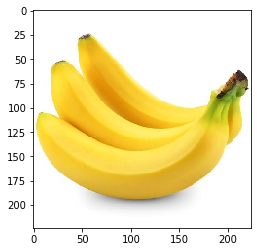

numpy array size (224, 224, 3)
image array size (1, 224, 224, 3)
102858752/102853048 [==============================] - 12s 0us/step

[[('n07753592', 'banana', 0.9993026), ('n07749582', 'lemon', 0.00014120796), ('n07716358', 'zucchini', 0.00013493975), ('n07720875', 'bell_pepper', 7.893238e-05), ('n07747607', 'orange', 7.704725e-05)]]


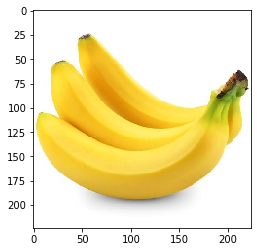

In [16]:
import PIL
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size' , numpy_image.shape)
image_batch=np.expand_dims(numpy_image, axis=0)
print('image array size' , image_batch.shape)
#prepare the image for the resnet50 model
precessed_image = resnet50.preprocess_input(image_batch.copy())
resnet_model = resnet50.ResNet50(weights = 'imagenet')
predictions = resnet_model.predict(precessed_image)
label = decode_predictions(predictions)
print(label)

In [ ]:
# tf.keras
# fine-tuning : FFNN 부분만 학습
# 

In [37]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image

#assert tf.executing_eagerly()
#tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE

data_dir = 'C:/Users/ICT01_09/Documents/jeju_h/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
label_names ={'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

In [38]:
all_images = list(data_dir.glob('*/*'))  # 파일명 로딩
all_images = [str(path) for path in all_images]
random.shuffle(all_images)

# 이미지 주소 라벨 할당
# 디렉토리의 경로를 관리하는 라이브러리
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)

train_test_split=(int)(data_size*0.2)  # 20 : 80 

x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]

img_size = 160
batch_size = 32

In [40]:
def _parse_data(x,y):
    image = tf.read_file(x)  # 파일에는 헤더파일(압축방법)
    image = tf.image.decode_jpeg(image, channels= 3)  # color
    image = tf.cast(image,tf.float32)  
    image = (image/127.5) -1   # 이미지를 절반으로 나누면 0~2 -1 => -1~1 사이로 만들어주려고
    # 이미지 사이즈 통일 160x160
    image = tf.image.resize(image, (img_size, img_size))
    return image,y 

def _input_fn(x,y):
    # 가장 기본단위 요소로 분해
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    # from_tensor_slices  : dataset을 생성
    
    ds = ds.map(_parse_data)
    # map : 함수를 적용할때 (데이터마다)
    
    # buffer : 거쳐가는 기억공간
    ds = ds.shuffle(buffer_size=data_size) # 데이터가 shuffle 될ㄹ수 있는 충분한 공간확보
    ds = ds.repeat()  # 데이터가 부족하면 처음부터 다시 시작하기 위해서 리핏
    ds = ds.batch(batch_size) # 미니배치
    ds = ds.prefetch(buffer_size=AUTOTUNE)  # 미니배치 사이즈를 어떤 사이즈(몇배)가 유리할지 결정은 자동으로 결정해라
    return ds                               # 32(미니배치)x3(자동)  ..or 32x5...  etc

train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [42]:
IMG_SHAPE = (img_size,img_size,3)
# include_top = flase : 
VGG16_MODEL = tf.keras.applications.VGG16(input_shape = IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

 # include_top=False : pooling 으로 1000개 분류하기 전에 모델셋팅 가져오기

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
58892288/58889256 [==============================] - 18s 0us/step


In [44]:
VGG16_MODEL.trainable =False
# flatten 가중치 -> false  니까 학습안한다는 뜻

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# ffnn 의 가중치는 학습
prediction_layer = tf.keras.layers.Dense(len(label_names),activation='softmax')

In [45]:
model = tf.keras.Sequential([ VGG16_MODEL, global_average_layer, prediction_layer])

# model (vgg16 가중치 + ffnn 가중치 학습)

In [46]:
# tf.train.AdamOptimizer()
# sparse : 희소행렬 (많은 걸 나눌때)
# 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000 
# 열개로 나눌때는 희소가 아님(천개정도 나눌때가 희소)
# 0000000100   <- 희소 아님

model.compile(optimizer = tf.train.AdamOptimizer(), loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [49]:
history = model.fit(train_ds, epochs = 100, steps_per_epoch=2)

Epoch 1/100
2/2 [==============================] - 17s 8s/step - loss: 1.6296 - acc: 0.1562
Epoch 2/100
2/2 [==============================] - 9s 4s/step - loss: 1.6474 - acc: 0.1250
Epoch 3/100
2/2 [==============================] - 9s 4s/step - loss: 1.6268 - acc: 0.2969
Epoch 4/100
2/2 [==============================] - 9s 4s/step - loss: 1.5894 - acc: 0.2969
Epoch 5/100
2/2 [==============================] - 9s 4s/step - loss: 1.5949 - acc: 0.2969
Epoch 6/100
2/2 [==============================] - 9s 4s/step - loss: 1.5719 - acc: 0.3750
Epoch 7/100
2/2 [==============================] - 9s 4s/step - loss: 1.6015 - acc: 0.2969
Epoch 8/100
2/2 [==============================] - 9s 4s/step - loss: 1.4813 - acc: 0.4219
Epoch 9/100
2/2 [==============================] - 8s 4s/step - loss: 1.4622 - acc: 0.4688
Epoch 10/100
2/2 [==============================] - 9s 4s/step - loss: 1.5065 - acc: 0.3750
Epoch 11/100
2/2 [==============================] - 8s 4s/step - loss: 1.4605 - acc: 0.4

2/2 [==============================] - 9s 4s/step - loss: 1.0588 - acc: 0.6250
Epoch 91/100
2/2 [==============================] - 9s 4s/step - loss: 0.7263 - acc: 0.8750
Epoch 92/100
2/2 [==============================] - 9s 4s/step - loss: 0.9093 - acc: 0.7500
Epoch 93/100
2/2 [==============================] - 9s 4s/step - loss: 0.9056 - acc: 0.7031
Epoch 94/100
2/2 [==============================] - 9s 4s/step - loss: 0.9070 - acc: 0.7500
Epoch 95/100
2/2 [==============================] - 8s 4s/step - loss: 1.0094 - acc: 0.7031
Epoch 96/100
2/2 [==============================] - 9s 4s/step - loss: 0.9370 - acc: 0.7031
Epoch 97/100
2/2 [==============================] - 9s 4s/step - loss: 1.0833 - acc: 0.5781
Epoch 98/100
2/2 [==============================] - 9s 4s/step - loss: 0.9153 - acc: 0.7188
Epoch 99/100
2/2 [==============================] - 8s 4s/step - loss: 0.8764 - acc: 0.7812
Epoch 100/100
2/2 [==============================] - 9s 4s/step - loss: 0.9731 - acc: 0.6719


KeyError: 'val_accuracy'

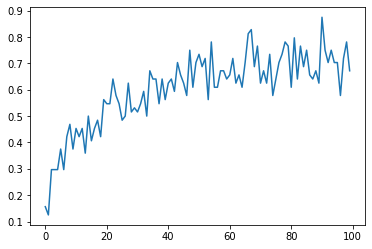

In [57]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'uppper left')
plt.show()